### Import Packages

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import random

### Import Data

In [13]:
npids = -1
data = pd.read_csv('nlst_407_prsn_20180510.csv').sample(frac=1)
data_canc = data[data['can_scr']>0][:-1]
data_no_canc = data[data['can_scr']==0][:len(data_canc)]
data = pd.concat([data_canc, data_no_canc])

/home/idies/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (201,224,225) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(array([284.,  58.,  37.,   3.,  10.,   6.,   0.,   0.,   0.,   1.]),
 array([  0. ,  16.8,  33.6,  50.4,  67.2,  84. , 100.8, 117.6, 134.4,
        151.2, 168. ]),
 <a list of 10 Patch objects>)

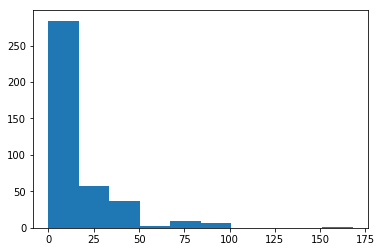

In [18]:
plt.hist(data['acrin_drinknum_form'])

### Set parameters

In [3]:
age    = data['age']
cancer = data['can_scr'].where(data['can_scr']<=0,2)-1
cancyr = (data['cancyr']+1).fillna(0).astype(int)

### Define axis

In [4]:
x = np.arange(age.max()+7)
y = np.arange(len(data))
tags = ['smoke', 'tmp']
z = np.arange(len(tags))

### Smoke data

In [5]:
start_smoke = data['smokeage'].fillna(0).astype(int)
quit_smoke  = data['age_quit'].fillna(age).astype(int)
mag_smoke   = data['smokeday']/data['smokeday'].max()

smoke = np.zeros((len(y), len(x)))
for pid in range(len(data)):
    smoke[pid, start_smoke.values[pid]:quit_smoke.values[pid]+1] = mag_smoke.values[pid]*cancer.values[pid]
    smoke[pid, age.values[pid]+1:age.values[pid]+cancyr.values[pid]+1] = np.nan

### Tmp data

In [6]:
start_tmp = data['smokeage'].fillna(0).astype(int)
quit_tmp  = data['age_quit'].fillna(age).astype(int)
mag_tmp   = data['smokeday']/data['smokeday'].max()

tmp = np.zeros((len(y), len(x)))
for pid in range(len(data)):
    tmp[pid, start_tmp.values[pid]:quit_tmp.values[pid]+1] = mag_tmp.values[pid]*cancer.values[pid]
    tmp[pid, age.values[pid]+1:age.values[pid]+cancyr.values[pid]+1] = np.nan

### Stack

In [7]:
everything = np.stack((smoke,tmp),2)

### 2D plot

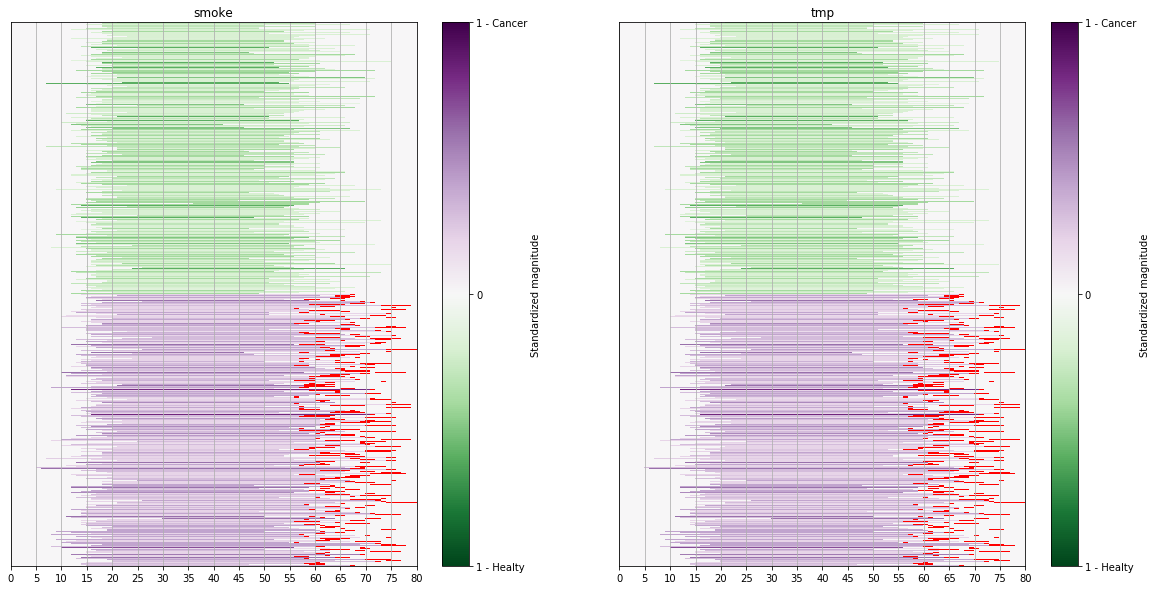

In [8]:
cmap = cm.PRGn_r
cmap.set_bad('r',1.)
fig, axes = plt.subplots(1,len(z), sharey=True, figsize=(20,10))
for i, (ax, tag) in enumerate(zip(axes, tags)):
    

    pcol = ax.pcolormesh(x, y, everything[:,:,i], 
                        cmap=cmap, vmin=-1, vmax=1)
    cbar = plt.colorbar(pcol, ax=ax, ticks=[-1, 0, 1], label='Standardized magnitude')
    cbar.ax.set_yticklabels(['1 - Healty', '0', '1 - Cancer'])
    ax.set_title(tag)
    
    ax.set_xticks(x[::5])
    ax.set_yticks([])

    # And a corresponding grid
    ax.grid(which='both')

    # Or if you want different settings for the grids:
    #ax.grid(which='minor', alpha=0.2)
    
    
    # ax.grid()

### 3D plot

In [9]:
if False:
    %matplotlib notebook

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Make the 3D grid
    X, Y, Z = np.meshgrid(x, y, z)


    cube = ax.scatter(X, Y, Z, zdir='z', c=np.ravel(everything), cmap=cmap, vmin=-1, vmax=1)
    cbar = fig.colorbar(cube, ticks=[-1, 0, 1], label='Standardized magnitude') # Add a color bar
    cbar.ax.set_yticklabels(['1 - Healty', '0', '1 - Cancer'])
    ax.set_xlabel('Age')
    ax.set_ylabel('Person')
    ax.set_zticks(z)
    ax.set_zticklabels(tags)
    plt.show()